<center>
<img src="../../img/ods_stickers.jpg">
## Открытый курс по машинному обучению
</center>
Автор материала: программист-исследователь Mail.ru Group, старший преподаватель Факультета Компьютерных Наук ВШЭ Юрий Кашницкий. Материал распространяется на условиях лицензии [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/). Можно использовать в любых целях (редактировать, поправлять и брать за основу), кроме коммерческих, но с обязательным упоминанием автора материала.

# <center>Домашнее задание 1. <br> Анализ данных по доходу населения UCI Adult</center>

**В задании предлагается с помощью Pandas ответить на несколько вопросов по данным репозитория UCI [Adult](https://archive.ics.uci.edu/ml/datasets/Adult) (качать данные не надо – они уже есть в репозитории). Для отправки решений используйте [онлайн-форму](https://goo.gl/forms/pB1tDIArMvTUsIUg2).**

Уникальные значения признаков (больше информации по ссылке выше):
- age: continuous.
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- fnlwgt: continuous.
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- education-num: continuous.
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- sex: Female, Male.
- capital-gain: continuous.
- capital-loss: continuous.
- hours-per-week: continuous.
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.   
- salary: >50K,<=50K

In [3]:
import pandas as pd
# чтоб картинки рисовались в тетрадке
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10, 8)

In [4]:
data = pd.read_csv('adult.data.csv.txt', names=['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 
'occupation', 'relationship', 'race', 
'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country','capital'], header=None, index_col=False)
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,capital
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


**1. Сколько мужчин и женщин (признак *sex*) представлено в этом наборе данных?**

In [8]:
data.sex.value_counts()
#data['sex'].describe(include=['object'])

 Male      21790
 Female    10771
Name: sex, dtype: int64

**2. Каков средний возраст (признак *age*) женщин?**

In [ ]:

grouped =data.groupby(['sex'])

for name,group in grouped:
    print (group['age'].mean())
    

data[data['sex']==' Female']['age'].mean()

**3. Какова доля граждан Германии (признак *native-country*)?**

In [59]:
len(data[data['native_country']==' Germany'])/len(data['native_country'])
#data['native_country'].value_counts(normalize=True)
for i,j in data['native_country'].value_counts(normalize=True).items():
    if i ==' Germany':
        print ('Germany: ',j)

Germany:  0.00420748748503


**4. Постройте гистограмму распределения (*bar plot*) образования людей (признак *education*).**

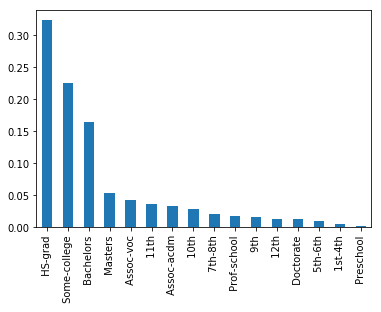

In [67]:
import matplotlib.pyplot as plt
%matplotlib inline
ser = data['education'].value_counts(normalize=True)
#ser.plot(kind='kde')

data['education'].value_counts(normalize=True).plot.bar()
#data['education'].value_counts().plot.hist()


**5. Каковы средние значения и среднеквадратичные отклонения возраста тех, кто получает более 50K в год (признак *salary*) и тех, кто получает менее 50K в год? **

In [65]:
print(data[data['capital']==' >50K']['age'].mean())
print(data[data['capital']==' >50K']['age'].std())
print(data[data['capital']==' <=50K']['age'].mean())
print(data[data['capital']==' <=50K']['age'].std())

44.24984058155847
10.51902771985177
36.78373786407767
14.020088490824813


**6. Правда ли, что люди, которые получают больше 50k, имеют как минимум высшее образование? (признак *education - Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters* или *Doctorate*)**

In [24]:
data[data['capital']==' >50K']['education'].unique()

array([' HS-grad', ' Masters', ' Bachelors', ' Some-college', ' Assoc-voc',
       ' Doctorate', ' Prof-school', ' Assoc-acdm', ' 7th-8th', ' 12th',
       ' 10th', ' 11th', ' 9th', ' 5th-6th', ' 1st-4th'], dtype=object)

**7. Выведите статистику возраста для каждой расы (признак *race*) и каждого пола. Используйте *groupby* и *describe*. Найдите таким образом максимальный возраст мужчин расы *Amer-Indian-Eskimo*.**

In [31]:
grouped =data.groupby(['race','sex'])

for name,group in grouped:
    print (name,group.age.describe())
    if name==(' Amer-Indian-Eskimo', ' Male'):
        print('MAX AGE THIS MAN is {}'.format(group.age.max()))


(' Amer-Indian-Eskimo', ' Female') count    119.000000
mean      37.117647
std       13.114991
min       17.000000
25%       27.000000
50%       36.000000
75%       46.000000
max       80.000000
Name: age, dtype: float64
(' Amer-Indian-Eskimo', ' Male') count    192.000000
mean      37.208333
std       12.049563
min       17.000000
25%       28.000000
50%       35.000000
75%       45.000000
max       82.000000
Name: age, dtype: float64
MAX AGE THIS MAN is 82
(' Asian-Pac-Islander', ' Female') count    346.000000
mean      35.089595
std       12.300845
min       17.000000
25%       25.000000
50%       33.000000
75%       43.750000
max       75.000000
Name: age, dtype: float64
(' Asian-Pac-Islander', ' Male') count    693.000000
mean      39.073593
std       12.883944
min       18.000000
25%       29.000000
50%       37.000000
75%       46.000000
max       90.000000
Name: age, dtype: float64
(' Black', ' Female') count    1555.000000
mean       37.854019
std        12.637197
min        1

**8. Среди кого больше доля зарабатывающих много (>50K): среди женатых или холостых мужчин (признак *marital-status*)? Женатыми считаем тех, у кого *marital-status* начинается с *Married* (Married-civ-spouse, Married-spouse-absent или Married-AF-spouse), остальных считаем холостыми.**

In [42]:
print(data[(data['capital'] == ' >50K')]['marital_status'].value_counts())
maried=0
nonmaried=0
for i,j in data[(data['capital'] == ' >50K')]['marital_status'].value_counts().items():
    if i in [' Married-civ-spouse',' Married-spouse-absent', ' Married-AF-spouse',' Married']:
        maried+=j
    else:
        nonmaried+=j
print(maried,nonmaried)

 Married-civ-spouse       6692
 Never-married             491
 Divorced                  463
 Widowed                    85
 Separated                  66
 Married-spouse-absent      34
 Married-AF-spouse          10
Name: marital_status, dtype: int64
6736 1105


**9. Какое максимальное число часов человек работает в неделю (признак *hours-per-week*)? Сколько людей работают такое количество часов и каков среди них процент зарабатывающих много?**

In [52]:
data['hours_per_week'].max()
s=len(data[data['hours_per_week']==99]['hours_per_week'])
k=len(data[(data['hours_per_week']==99) & (data['capital'] == ' >50K')]['hours_per_week'])
k/s

0.29411764705882354

**10. Посчитайте среднее время работы (*hours-per-week*) зарабатывающих мало и много (*salary*) для каждой страны (*native-country*).**

In [54]:
grouped =data.groupby(['native_country', 'capital'])

for name,group in grouped:
    print (name, group.hours_per_week.mean())

(' ?', ' <=50K') 40.16475972540046
(' ?', ' >50K') 45.54794520547945
(' Cambodia', ' <=50K') 41.416666666666664
(' Cambodia', ' >50K') 40.0
(' Canada', ' <=50K') 37.91463414634146
(' Canada', ' >50K') 45.64102564102564
(' China', ' <=50K') 37.38181818181818
(' China', ' >50K') 38.9
(' Columbia', ' <=50K') 38.68421052631579
(' Columbia', ' >50K') 50.0
(' Cuba', ' <=50K') 37.98571428571429
(' Cuba', ' >50K') 42.44
(' Dominican-Republic', ' <=50K') 42.338235294117645
(' Dominican-Republic', ' >50K') 47.0
(' Ecuador', ' <=50K') 38.041666666666664
(' Ecuador', ' >50K') 48.75
(' El-Salvador', ' <=50K') 36.03092783505155
(' El-Salvador', ' >50K') 45.0
(' England', ' <=50K') 40.483333333333334
(' England', ' >50K') 44.53333333333333
(' France', ' <=50K') 41.05882352941177
(' France', ' >50K') 50.75
(' Germany', ' <=50K') 39.13978494623656
(' Germany', ' >50K') 44.97727272727273
(' Greece', ' <=50K') 41.80952380952381
(' Greece', ' >50K') 50.625
(' Guatemala', ' <=50K') 39.36065573770492
(' Gua